In [1]:
model_n = 1
net = 'stepnet'
epoch = 'stim1' # epoch = 2 #go1 epoch
dir_specific_all = 'varGo/lowD/'#'lowD/combos' #'lowD/combos' #lowD/combos' ##grad_norm_l2h000001' /Documents/data/rnn/multitask/varGo/lowD/most/
rule_list = ['dmsgo', 'dmsnogo', 'dmcgo', 'dmcnogo']

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import pdb
import numpy as np
import numpy.random as npr
import tensorflow as tf
import sys
import matplotlib.pyplot as plt
import re
from sklearn.decomposition import PCA
from numpy import linalg as LA
from scipy.spatial import distance
from scipy.linalg import subspace_angles

import getpass
ui = getpass.getuser()
if ui == 'laura':
    p = '/home/laura'
elif ui == 'lauradriscoll':
    p = '/Users/lauradriscoll/Documents'

/Users/lauradriscoll/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
net = 'stepnet'
PATH_YANGNET = os.path.join(p,'code/multitask-nets',net)

sys.path.insert(0, PATH_YANGNET)
from task import generate_trials, rule_name, rule_index_map
from network import Model
import tools
from tools_lnd import plot_N, plot_FP, gen_trials_from_model_dir, name_best_ckpt, gen_X_from_model_dir_epoch

In [10]:
# dir_specific_single = #'single_tasks'#'grad_norm_l2h000001'
dir_specific_all = 'stepnet/lowD/softplus'#'combos'#'grad_norm_l2h000001'#''combos'#'grad_norm_l2001' #'grad_norm_l2001' #'grad_norm_l2001'#
rule_list = ['fdgo', 'reactgo', 'delaygo', 'fdanti', 'reactanti', 'delayanti']
rule_list = ['delaygo', 'delayanti']

fig = plt.figure(figsize=(5, 5),tight_layout=True,facecolor='white')
plt.rcParams.update({'font.size': 16})
file_name = 'pca on go period'

fldr = os.path.join('ncm/dynamic_complexity/',dir_specific_all,str(model_n))
if not os.path.exists(fldr):
    os.makedirs(fldr)

for rule1_ind in range(len(rule_list)):
    for rule2_ind in range(rule1_ind+1,len(rule_list)):
        rule1 = rule_list[rule1_ind]
        rule2 = rule_list[rule2_ind]

        # for model_n in range(1):
        model_dir_all = os.path.join(p,'data/rnn/multitask/',dir_specific_all,'most',str(model_n))
        
        #MULTI
        model = Model(model_dir_all)
        ckpt_n = name_best_ckpt(model_dir_all,'delaygo')#
#         ckpt_n = 352000#name_best_ckpt(model_dir_all,'delaygo')#
        ckpt_n_dir = os.path.join(model_dir_all,'ckpts/model.ckpt-' + str(int(ckpt_n)))

        trial1 = gen_trials_from_model_dir(model_dir_all,rule1)
        X1, x1 = gen_X_from_model_dir_epoch(model_dir_all,ckpt_n_dir,trial1,epoch)

        trial2 = gen_trials_from_model_dir(model_dir_all,rule2)
        X2, x2 = gen_X_from_model_dir_epoch(model_dir_all,ckpt_n_dir,trial2,epoch)

        X = np.concatenate((X1, X2), axis = 1)
        N,S = np.shape(X) # neurons x trials (stim)  
        pca = PCA()
        X_pca = pca.fit_transform(X.T)

        n_pcs = 5
        cmap=plt.get_cmap('Set1')
        for pc in range(n_pcs):
            fig = plt.figure(figsize=(10, 5),tight_layout=True,facecolor='white')
            c = cmap(pc/9)
            plt.subplot(1,2,1)
            plt.plot(X_pca[0:10000:25,pc],':',c = c)
            plt.plot(X_pca[10000:20000:25,pc],c = c)
            plt.title(epoch+' start : ' +rule1+' '+rule2)
            plt.xlabel('Stimulus')
            plt.ylabel('PC Activation')
            
            plt.subplot(1,2,2)
            plt.plot(X_pca[24:10000:25,pc],':',c = c)
            plt.plot(X_pca[10024:20000:25,pc],c = c)
            plt.title(epoch+' end : ' +rule1+' '+rule2)
            plt.xlabel('Stimulus')
            plt.legend(('PC'+str(pc+1)+' '+rule1,'PC'+str(pc+1)+' '+rule2))


#             plt.savefig(fldr + '/pc_' + str(pc) +epoch+' end : ' +rule1+' '+rule2 + dir_specific_all + '_ckpt_'+ str(ckpt_n) + '_model_' + str(model_n) + '.svg')

        plt.show()

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
Instructions for updating:
Use `tf.global_variables_initializer` instead.


InternalError: Blas GEMM launch failed : a.shape=(64, 281), b.shape=(281, 256), m=64, n=256, k=281
	 [[{{node rnn/while/rnn/leaky_rnn_cell/MatMul}} = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](rnn/while/rnn/leaky_rnn_cell/concat, rnn/while/rnn/leaky_rnn_cell/MatMul/Enter)]]
	 [[{{node gradients/b_count_2/_67}} = _HostRecv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_476_gradients/b_count_2", tensor_type=DT_BOOL, _device="/job:localhost/replica:0/task:0/device:CPU:0"](^_cloopgradients/rnn/while/rnn/leaky_rnn_cell/concat_grad/ShapeN/StackPopV2/_11)]]

Caused by op u'rnn/while/rnn/leaky_rnn_cell/MatMul', defined at:
  File "/home/laura/miniconda3/envs/py27/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/laura/miniconda3/envs/py27/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/laura/miniconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/laura/miniconda3/envs/py27/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/laura/miniconda3/envs/py27/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/home/laura/miniconda3/envs/py27/lib/python2.7/site-packages/tornado/ioloop.py", line 1064, in start
    handler_func(fd_obj, events)
  File "/home/laura/miniconda3/envs/py27/lib/python2.7/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/laura/miniconda3/envs/py27/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/home/laura/miniconda3/envs/py27/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/laura/miniconda3/envs/py27/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/home/laura/miniconda3/envs/py27/lib/python2.7/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/laura/miniconda3/envs/py27/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/laura/miniconda3/envs/py27/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/laura/miniconda3/envs/py27/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/laura/miniconda3/envs/py27/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/laura/miniconda3/envs/py27/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/laura/miniconda3/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2714, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/laura/miniconda3/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2818, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/laura/miniconda3/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2878, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-f08c4fcba005>", line 24, in <module>
    model = Model(model_dir_all)
  File "/home/laura/code/yangnet/training/network.py", line 487, in __init__
    self._build(hp)
  File "/home/laura/code/yangnet/training/network.py", line 496, in _build
    self._build_fused(hp)
  File "/home/laura/code/yangnet/training/network.py", line 582, in _build_fused
    self.cell, self.x, dtype=tf.float32, time_major=True)
  File "/home/laura/miniconda3/envs/py27/lib/python2.7/site-packages/tensorflow/python/ops/rnn.py", line 664, in dynamic_rnn
    dtype=dtype)
  File "/home/laura/miniconda3/envs/py27/lib/python2.7/site-packages/tensorflow/python/ops/rnn.py", line 868, in _dynamic_rnn_loop
    swap_memory=swap_memory)
  File "/home/laura/miniconda3/envs/py27/lib/python2.7/site-packages/tensorflow/python/ops/control_flow_ops.py", line 3274, in while_loop
    return_same_structure)
  File "/home/laura/miniconda3/envs/py27/lib/python2.7/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2994, in BuildLoop
    pred, body, original_loop_vars, loop_vars, shape_invariants)
  File "/home/laura/miniconda3/envs/py27/lib/python2.7/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2929, in _BuildLoop
    body_result = body(*packed_vars_for_body)
  File "/home/laura/miniconda3/envs/py27/lib/python2.7/site-packages/tensorflow/python/ops/control_flow_ops.py", line 3243, in <lambda>
    body = lambda i, lv: (i + 1, orig_body(*lv))
  File "/home/laura/miniconda3/envs/py27/lib/python2.7/site-packages/tensorflow/python/ops/rnn.py", line 836, in _time_step
    (output, new_state) = call_cell()
  File "/home/laura/miniconda3/envs/py27/lib/python2.7/site-packages/tensorflow/python/ops/rnn.py", line 822, in <lambda>
    call_cell = lambda: cell(input_t, state)
  File "/home/laura/miniconda3/envs/py27/lib/python2.7/site-packages/tensorflow/python/ops/rnn_cell_impl.py", line 233, in __call__
    return super(RNNCell, self).__call__(inputs, state)
  File "/home/laura/miniconda3/envs/py27/lib/python2.7/site-packages/tensorflow/python/layers/base.py", line 364, in __call__
    outputs = super(Layer, self).__call__(inputs, *args, **kwargs)
  File "/home/laura/miniconda3/envs/py27/lib/python2.7/site-packages/tensorflow/python/keras/engine/base_layer.py", line 769, in __call__
    outputs = self.call(inputs, *args, **kwargs)
  File "/home/laura/code/yangnet/training/network.py", line 214, in call
    array_ops.concat([inputs, state], 1), self._kernel)
  File "/home/laura/miniconda3/envs/py27/lib/python2.7/site-packages/tensorflow/python/ops/math_ops.py", line 2053, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "/home/laura/miniconda3/envs/py27/lib/python2.7/site-packages/tensorflow/python/ops/gen_math_ops.py", line 4560, in mat_mul
    name=name)
  File "/home/laura/miniconda3/envs/py27/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/laura/miniconda3/envs/py27/lib/python2.7/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/home/laura/miniconda3/envs/py27/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 3272, in create_op
    op_def=op_def)
  File "/home/laura/miniconda3/envs/py27/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1768, in __init__
    self._traceback = tf_stack.extract_stack()

InternalError (see above for traceback): Blas GEMM launch failed : a.shape=(64, 281), b.shape=(281, 256), m=64, n=256, k=281
	 [[{{node rnn/while/rnn/leaky_rnn_cell/MatMul}} = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](rnn/while/rnn/leaky_rnn_cell/concat, rnn/while/rnn/leaky_rnn_cell/MatMul/Enter)]]
	 [[{{node gradients/b_count_2/_67}} = _HostRecv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_476_gradients/b_count_2", tensor_type=DT_BOOL, _device="/job:localhost/replica:0/task:0/device:CPU:0"](^_cloopgradients/rnn/while/rnn/leaky_rnn_cell/concat_grad/ShapeN/StackPopV2/_11)]]


<Figure size 360x360 with 0 Axes>

In [24]:
fig = plt.figure(figsize=(5, 5),tight_layout=True,facecolor='white')
plt.rcParams.update({'font.size': 16})
file_name = 'pca on go period'
epoch = 'go1'

for rule1_ind in range(len(rule_list)):
    for rule2_ind in range(rule1_ind+1,len(rule_list)):
        rule1 = rule_list[rule1_ind]
        rule2 = rule_list[rule2_ind]

        # for model_n in range(1):
        model_dir_all = os.path.join(p,'data/rnn/multitask/',dir_specific_all,'most',str(model_n))

        #MULTI
        model = Model(model_dir_all)
#         ckpt_n = name_best_ckpt(model_dir_all,'delaygo') #352000#
        ckpt_n_dir = os.path.join(model_dir_all,'ckpts/model.ckpt-' + str(int(ckpt_n)))

        trial1 = gen_trials_from_model_dir(model_dir_all,rule1)
#         X1 = gen_X_from_model_dir_epoch(model_dir_all,ckpt_n_dir,trial1,epoch)
        X1, _ = gen_X_from_model_dir(model_dir_all,ckpt_n_dir,trial1)

        trial2 = gen_trials_from_model_dir(model_dir_all,rule2)
#         X2 = gen_X_from_model_dir_epoch(model_dir_all,ckpt_n_dir,trial2,epoch)
        X2, _ = gen_X_from_model_dir(model_dir_all,ckpt_n_dir,trial2)

        X = np.concatenate((X1, X2), axis = 1)
        T,S,Ni = np.shape(trial1.x) # neurons x trials (stim)  
        pca = PCA()
        X_pca = pca.fit_transform(X.T)
        
        inds = T
        max_inds = S*inds
        X1_pca = X_pca[:max_inds,:]
        X2_pca = X_pca[max_inds:2*max_inds,:]
        pc_lim = 256
        half_inds = int(max_inds/2)
        dist12_same = np.zeros((int(S/2),inds))
        dist12_anti = np.zeros((int(S/2),inds))
        dist22_anti = np.zeros((int(S/2),inds))
        dist11_anti = np.zeros((int(S/2),inds))
        dist22_same = np.zeros((int(S/2),inds))
        dist11_same = np.zeros((int(S/2),inds))

        for x_shift in range(0,inds):
            dist12_same[:,x_shift] = LA.norm(X1_pca[x_shift:half_inds:inds,:pc_lim]-X2_pca[x_shift:half_inds:inds,:pc_lim],axis=1)
            dist12_anti[:,x_shift] = LA.norm(X1_pca[x_shift:half_inds:inds,:pc_lim]-X2_pca[half_inds+x_shift:max_inds:inds,:pc_lim],axis=1)

            dist22_anti[:,x_shift] = LA.norm(X2_pca[x_shift:half_inds:inds,:pc_lim]-X2_pca[half_inds+x_shift:max_inds:inds,:pc_lim],axis=1)
            dist11_anti[:,x_shift] = LA.norm(X1_pca[x_shift:half_inds:inds,:pc_lim]-X1_pca[half_inds+x_shift:max_inds:inds,:pc_lim],axis=1)
            dist22_same[:,x_shift] = LA.norm(X2_pca[x_shift:half_inds:inds,:pc_lim]-X2_pca[2*T+x_shift:2*T+half_inds:inds,:pc_lim],axis=1)
            dist11_same[:,x_shift] = LA.norm(X1_pca[x_shift:half_inds:inds,:pc_lim]-X1_pca[2*T+x_shift:2*T+half_inds:inds,:pc_lim],axis=1)


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/tanh/most/1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/tanh/most/1/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_

/Users/lauradriscoll/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


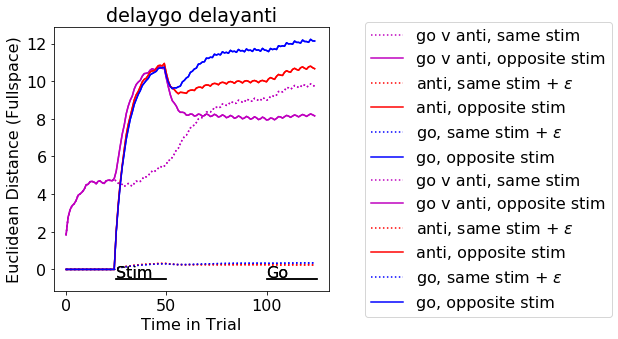

In [10]:
plt.plot(np.mean(dist12_same,axis=0),'m:', label='go v anti, same stim')
plt.plot(np.mean(dist12_anti,axis=0),'m-', label='go v anti, opposite stim')
plt.plot(np.mean(dist22_same,axis=0),'r:', label='anti, same stim + $\epsilon$')
plt.plot(np.mean(dist22_anti,axis=0),'r-', label='anti, opposite stim')
plt.plot(np.mean(dist11_same,axis=0),'b:', label='go, same stim + $\epsilon$')
plt.plot(np.mean(dist11_anti,axis=0),'b-', label='go, opposite stim')

epoch_offset = -.5
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.plot([trial1.epochs['stim1'][0], trial1.epochs['stim1'][1]],[epoch_offset,epoch_offset],'-k')
plt.plot([trial1.epochs['go1'][0], T],[epoch_offset,epoch_offset],'-k')
plt.text(trial1.epochs['stim1'][0],.8*epoch_offset,'Stim')
plt.text(trial1.epochs['go1'][0],.8*epoch_offset,'Go')
plt.xlabel('Time in Trial')
plt.ylabel('Euclidean Distance (Fullspace)')
plt.title(rule1+' '+rule2)

# plt.savefig(fldr +'/'+ dir_specific_all + '_ckpt_'+ str(ckpt_n) + '_model_' + str(model_n) + '.svg')
plt.show()

In [16]:
np.shape(trial.stim_locs)

(400, 2)

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/tanh/most/1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/tanh/most/1/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/tanh/most/1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/da

/Users/lauradriscoll/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/tanh/most/1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/tanh/most/1/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/tanh/most/1/ckpts/model.ckpt-280000
Variables being optimized:
<tf.Variable 'rnn/l

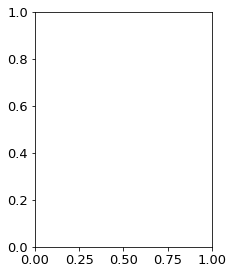

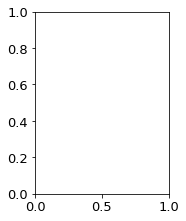

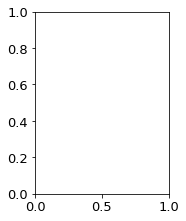

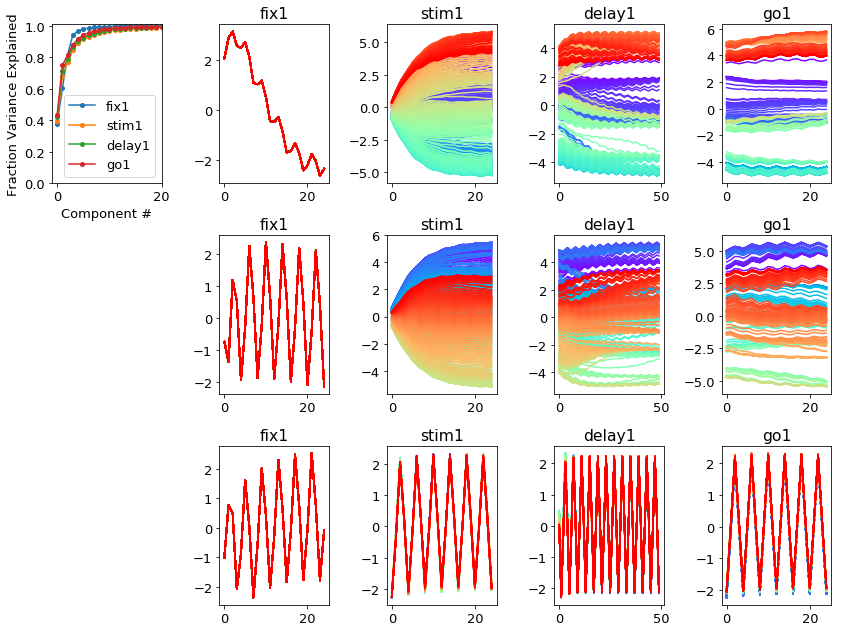

In [18]:
FONT_WEIGHT = 'bold'
fig = plt.figure(figsize=(12, 9),tight_layout=True,facecolor='white')
plt.rcParams.update({'font.size': 13})

n_pcs = 50
epoch = 'go1'
rule = 'delayanti'
trial = gen_trials_from_model_dir(model_dir_all,rule)
epoch_set = ['fix1','stim1','delay1','go1']
s = np.shape(trial.stim_locs)
e_ind = 1
n_pcs_plot = 3
cmap=plt.get_cmap('rainbow')

for epoch in epoch_set:
    e_ind += 1

    trial = gen_trials_from_model_dir(model_dir_all,rule)
    X, x = gen_X_from_model_dir_epoch(model_dir_all,ckpt_n_dir,trial,epoch)
    N,S = np.shape(X) # neurons x trials (stim)
    s_list = np.tile(np.expand_dims(trial.stim_locs[:,0],axis=1),(1,int(S/s[0])))
    t_list = np.tile(np.expand_dims(range(int(S/s[0])),axis=1),s[0])

    row_means = np.mean(X, axis=1)
    X_center = X - row_means.reshape(X.shape[0],1)

    pcar = PCA(n_components=n_pcs)
    pcar.fit(X_center.T)
    X_pc = pcar.transform(X_center.T)
    
    for pc in range(n_pcs_plot):
        ax_all = fig.add_subplot(n_pcs_plot,len(epoch_set)+1,e_ind+(len(epoch_set)+1)*pc)
        for t in range(np.shape(trial.stim_locs)[0]):
            c = cmap(trial.stim_locs[t,0]/max(trial.stim_locs[:,0]))
            ind = range(t*int(S/s[0]),(t+1)*int(S/s[0]))
            plt.plot(X_pc[ind,pc],c=c)
        plt.title(epoch)
    
#     ax_all = fig.add_subplot(2,len(epoch_set)+1,e_ind)
#     plt.plot(X_pc[:,0],X_pc[:,1],'.')
#     plt.title(epoch)

    ax_all = fig.add_subplot(n_pcs_plot,len(epoch_set)+1,1)
    plt.plot(np.cumsum(pcar.explained_variance_)/np.sum(pcar.explained_variance_),'-o', markersize = 4, label = epoch)
    
    
plt.legend()
ax_all.set_ylim(0, 1.01)
ax_all.set_xlim(-1, 20)
ax_all.set_xlabel('Component #')
ax_all.set_ylabel('Fraction Variance Explained')
# plt.savefig(fldr +'/each_epoch_space' + dir_specific_all + '_ckpt_'+ str(ckpt_n) + '_model_' + str(model_n) + '.svg')
plt.show()


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/tanh/most/1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/tanh/most/1/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/tanh/most/1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/da

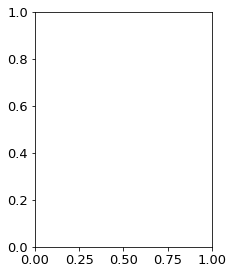

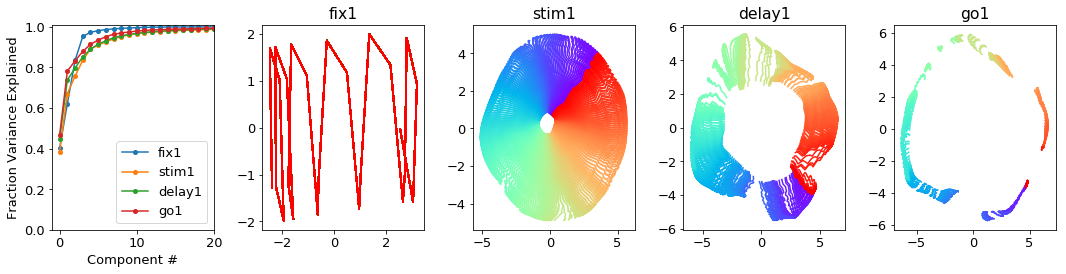

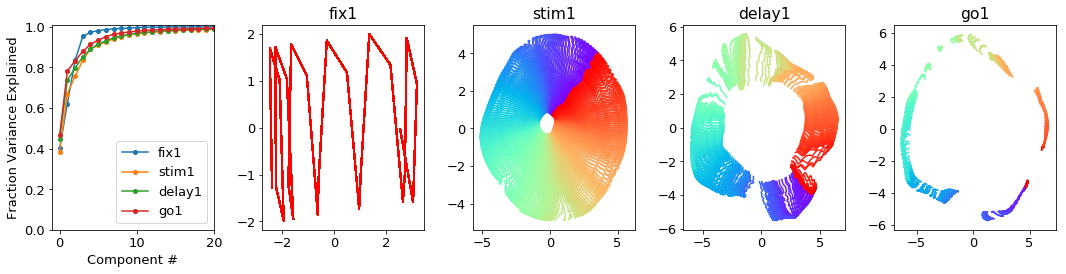

In [21]:
FONT_WEIGHT = 'bold'
fig = plt.figure(figsize=(15, 4),tight_layout=True,facecolor='white')
plt.rcParams.update({'font.size': 13})

n_pcs = 50
epoch = 'go1'
rule = 'delaygo'
trial = gen_trials_from_model_dir(model_dir_all,rule)
epoch_set = ['fix1','stim1','delay1','go1']
s = np.shape(trial.stim_locs)
e_ind = 1
n_pcs_plot = 3
cmap=plt.get_cmap('rainbow')

for epoch in epoch_set:
    e_ind += 1

    trial = gen_trials_from_model_dir(model_dir_all,rule)
    X, x = gen_X_from_model_dir_epoch(model_dir_all,ckpt_n_dir,trial,epoch)
    N,S = np.shape(X) # neurons x trials (stim)
    s_list = np.tile(np.expand_dims(trial.stim_locs[:,0],axis=1),(1,int(S/s[0])))
    t_list = np.tile(np.expand_dims(range(int(S/s[0])),axis=1),s[0])

    row_means = np.mean(X, axis=1)
    X_center = X - row_means.reshape(X.shape[0],1)

    pcar = PCA(n_components=n_pcs)
    pcar.fit(X_center.T)
    X_pc = pcar.transform(X_center.T)
    
#     for pc in range(n_pcs_plot):
    ax_all = fig.add_subplot(1,len(epoch_set)+1,e_ind)
    for t in range(np.shape(trial.stim_locs)[0]):
        c = cmap(trial.stim_locs[t,0]/max(trial.stim_locs[:,0]))
        ind = range(t*int(S/s[0]),(t+1)*int(S/s[0]))
        plt.plot(X_pc[ind,0],X_pc[ind,1],'-',c=c)
    plt.title(epoch)
    
    ax_all = fig.add_subplot(1,len(epoch_set)+1,1)
    plt.plot(np.cumsum(pcar.explained_variance_)/np.sum(pcar.explained_variance_),'-o', markersize = 4, label = epoch)
    
    
plt.legend()
ax_all.set_ylim(0, 1.01)
ax_all.set_xlim(-1, 20)
ax_all.set_xlabel('Component #')
ax_all.set_ylabel('Fraction Variance Explained')
# plt.savefig(fldr +'/each_epoch_2Dspace' + dir_specific_all + '_ckpt_'+ str(ckpt_n) + '_model_' + str(model_n) + '.svg')
plt.show()

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/tanh/most/1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/tanh/most/1/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/tanh/most/1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/da

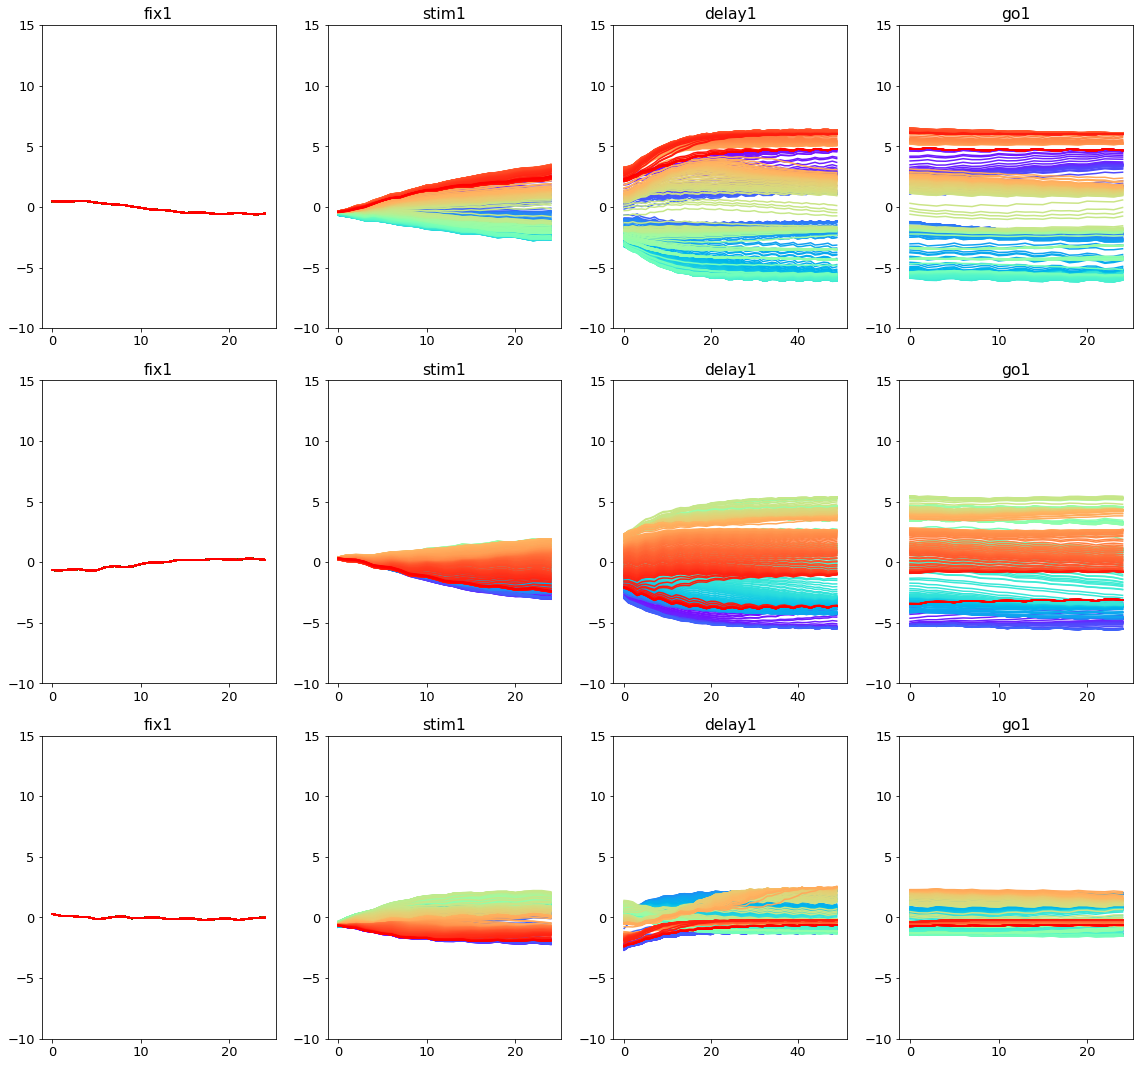

In [29]:
FONT_WEIGHT = 'bold'
fig = plt.figure(figsize=(20, 15),tight_layout=True,facecolor='white')
plt.rcParams.update({'font.size': 13})
cmap=plt.get_cmap('rainbow')

n_pcs = 50
epoch = 'delay1'
rule = 'delaygo'
trial = gen_trials_from_model_dir(model_dir_all,rule)
epoch_set = ['fix1','stim1','delay1','go1']
s = np.shape(trial.stim_locs)
e_ind = 0
npc_plot=3

trial = gen_trials_from_model_dir(model_dir_all,rule)
X, _ = gen_X_from_model_dir_epoch(model_dir_all,ckpt_n_dir,trial,epoch)
N,S = np.shape(X) # neurons x trials (stim)
X_epoch_end = X[:,int(S/s[0])-1:S:int(S/s[0])]
X_center = X_epoch_end - row_means.reshape(X_epoch_end.shape[0],1)
pcar = PCA(n_components=n_pcs)
pcar.fit(X_center.T)

for epoch in epoch_set:
    e_ind += 1

    trial = gen_trials_from_model_dir(model_dir_all,rule)
    X, _ = gen_X_from_model_dir_epoch(model_dir_all,ckpt_n_dir,trial,epoch)
    N,S = np.shape(X) # neurons x trials (stim)
    s_list = np.tile(np.expand_dims(trial.stim_locs,axis=1),(1,int(S/s[0])))
    t_list = np.tile(np.expand_dims(range(int(S/s[0])),axis=1),s[0])

    row_means = np.mean(X, axis=1)
    X_center = X - row_means.reshape(X.shape[0],1)
    X_pc = pcar.transform(X_center.T)
    
    for pc in range(n_pcs_plot):
        ax_all = fig.add_subplot(n_pcs_plot,len(epoch_set)+1,e_ind+(len(epoch_set)+1)*pc)
        for t in range(np.shape(trial.stim_locs)[0]):
            c = cmap(trial.stim_locs[t,1]/max(trial.stim_locs[:,1]))
            ind = range(t*int(S/s[0]),(t+1)*int(S/s[0]))
            plt.plot(X_pc[ind,pc],c=c)
        plt.title(epoch)
        plt.ylim(-10,15)
        plt.title(epoch)
        
# plt.savefig(fldr +'/one_epoch_space : '+ epoch+ '_' + dir_specific_all + '_ckpt_'+ str(ckpt_n) + '_model_' + str(model_n) + '.svg')    
plt.show()

In [30]:
epoch_comp = {}
epoch_len = {}
rule_set = ['delaygo', 'delayanti']
epoch_set = ['fix1','stim1','delay1','go1'] #
n_pcs = 256
s = np.shape(trial.stim_locs)[0]

for rule in rule_set:
    for epoch in epoch_set:
        trial = gen_trials_from_model_dir(model_dir_all,rule)
        X,_ = gen_X_from_model_dir_epoch(model_dir_all,ckpt_n_dir,trial,epoch)
        N,S = np.shape(X) # neurons x trials (stim)
        epoch_len[epoch] = int(S/s)
        for t_start in range(epoch_len[epoch]):
            X_epoch_end = X[:,t_start:S:epoch_len[epoch]]
            X_diff = X_epoch_end[:,:int(s/2)] - X_epoch_end[:,int(s/2):]
            X_center = X_epoch_end# - row_means.reshape(X_epoch_end.shape[0],1)
            pcar = PCA(n_components=n_pcs)
            pcar.fit(X_center.T)
            X_diff_components = pcar.transform(X_diff.T)
            epoch_comp[rule,epoch,t_start] = pcar.components_#X_diff_components


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/tanh/most/1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/tanh/most/1/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/tanh/most/1/ckpts/model.ckpt-280000
Variables being optimized:
<tf.Variable 'rnn/l

In [31]:
pc_set = range(2)#range(0,int(s/2),int(s/4))#range(0,int(s/2),int(s/4))
sa_epoch = np.zeros((len(rule_set),len(epoch_set),len(epoch_set)))
sa_rule = np.zeros((len(epoch_set),125))

for rule1,ri1 in zip(rule_set,range(len(rule_set))):
    for epoch1,ei1 in zip(epoch_set,range(len(epoch_set))):
        e_start = np.max([trial.epochs[epoch_set[ei1]][0],0])

        for t_start in range(epoch_len[epoch_set[ei1]]):
            sa_rule[ei1,t_start+e_start] = np.mean(np.rad2deg(
                subspace_angles(epoch_comp[rule_set[0],epoch1,t_start][pc_set,:].T, 
                                epoch_comp[rule_set[1],epoch1,t_start][pc_set,:].T)))
        for epoch2,ei2 in zip(epoch_set,range(len(epoch_set))):
            sa_epoch[ri1,ei1,ei2] = np.mean(np.rad2deg(
                subspace_angles(epoch_comp[rule1,epoch1,epoch_len[epoch_set[ei1]]-1][pc_set,:].T, 
                                epoch_comp[rule1,epoch2,epoch_len[epoch_set[ei2]]-1][pc_set,:].T)))
            
fig = plt.figure(figsize=(9, 4),tight_layout=True,facecolor='white')
plt.rcParams.update({'font.size': 14})

for ri1 in range(len(rule_set)):
    ax = fig.add_subplot(1,len(rule_set),ri1+1)
    plt.imshow(sa_epoch[ri1,:,:],vmin = 0,vmax = 90,cmap = 'gray')
    plt.title(rule_set[ri1])
    plt.xticks(np.arange(len(epoch_set)),epoch_set)
    for (j,i),label in np.ndenumerate(sa_epoch[ri1,:,:]):
        ax.text(i,j,round(label),ha='center',va='center',color='white')
plt.colorbar()
ax = fig.add_subplot(1,len(rule_set),1)
plt.yticks(np.arange(len(epoch_set)),epoch_set)
# plt.savefig(fldr +'/epoch_set_w_in_rule_' + dir_specific_all + '_ckpt_'+ str(ckpt_n) + '_model_' + str(model_n) + '.svg')
plt.show()

IOError: [Errno 2] No such file or directory: 'ncm/dynamic_complexity/tanh/1/epoch_set_w_in_rule_tanh/_ckpt_280000_model_1.svg'

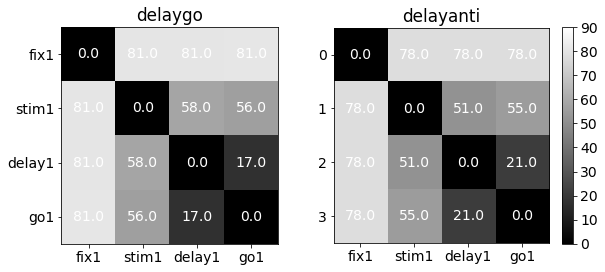

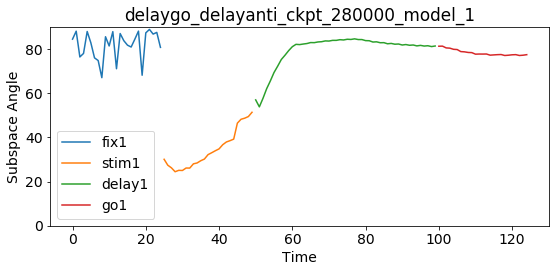

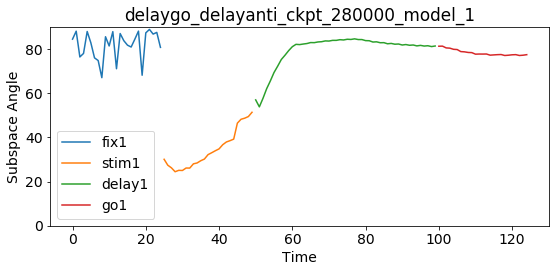

In [33]:
fig = plt.figure(figsize=(8, 4),tight_layout=True,facecolor='white')
plt.rcParams.update({'font.size': 14})       
for ei1 in range(len(epoch_set)):
    e_start = np.max([trial.epochs[epoch_set[ei1]][0],0])
    e_end = trial.epochs[epoch_set[ei1]][1]
    if e_end is None:
        e_end = 125
    plt.plot(range(e_start,e_end),sa_rule[ei1,e_start:e_end],label = epoch_set[ei1])
    
plt.ylabel('Subspace Angle')
plt.xlabel('Time')
plt.ylim((0,90))
plt.legend()
plt.title(rule_set[0]+'_'+rule_set[1] + '_ckpt_'+ str(ckpt_n) + '_model_' + str(model_n))
# plt.savefig(fldr + '/timecourse_rule_set_w_in_epoch_' + rule_set[0]+'_'+rule_set[1]+ 
#             dir_specific_all + '_ckpt_'+ str(ckpt_n) + '_model_' + str(model_n) + '.svg')
plt.show()

In [27]:
rule_set = ['delaygo','delayanti']

fig = plt.figure(figsize=(10, 10),tight_layout=True,facecolor='white')
plt.rcParams.update({'font.size': 13})

trial = gen_trials_from_model_dir(model_dir_all,rule_set[0])
trial_anti = gen_trials_from_model_dir(model_dir_all,rule_set[1])

n_stim = len(trial.stim_locs)
inds = range(n_stim)
offset = int(n_stim/2)
inds_anti = [int(j) for j in np.concatenate((inds[offset:n_stim],inds[0:offset]))]
inds_1 = [int(j) for j in np.concatenate((inds[1:n_stim],inds[0:1]))]

_, X = gen_X_from_model_dir(model_dir_all,ckpt_n_dir,trial)
_, X_anti = gen_X_from_model_dir(model_dir_all,ckpt_n_dir,trial_anti)

X_ga_pi = np.square(np.sum(np.power(X - X_anti[:,inds_anti,:],2),axis = 0))
X_ga_0 = np.square(np.sum(np.power(X - X_anti,2),axis = 0))
X_gg_pi = np.square(np.sum(np.power(X - X[:,inds_anti,:],2),axis = 0))
X_gg_1 = np.square(np.sum(np.power(X - X[:,inds_1,:],2),axis = 0))

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/lowD/combos/most/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/lowD/combos/most/0/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/lowD/combos/most/0/model.ckpt
Model restored from file: /Users/laura

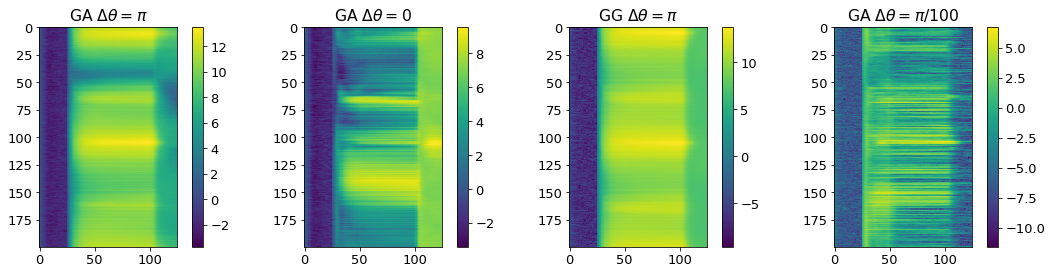

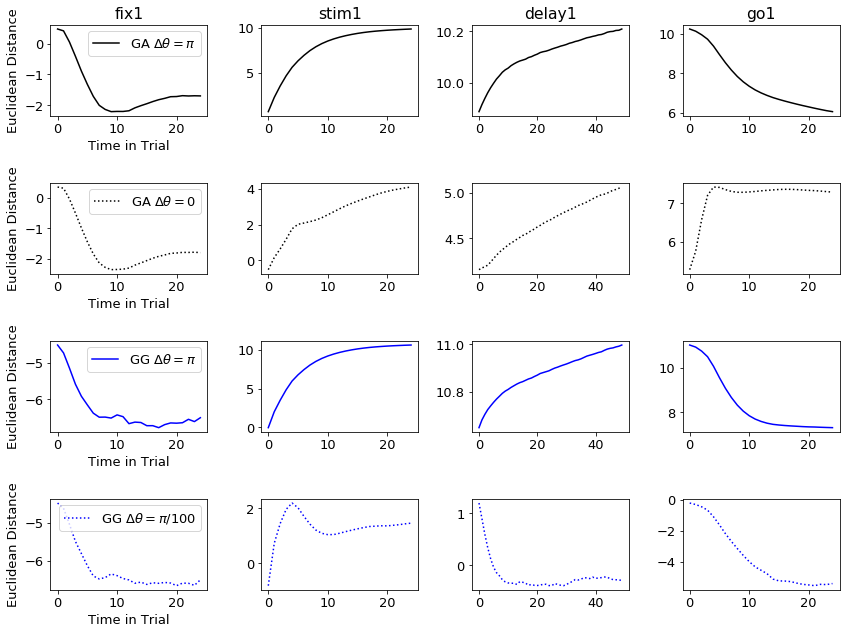

In [28]:
filename = dir_specific_all
epoch_set = ['fix1','stim1','delay1','go1']
T = 125
trial_set = range(0,400,2)
nc = 4

X_ga_pi_same_mod = np.log(X_ga_pi[trial_set,:])
X_ga_0_same_mod = np.log(X_ga_0[trial_set,:])
X_gg_pi_same_mod = np.log(X_gg_pi[trial_set,:])
X_gg_1_same_mod = np.log(X_gg_1[trial_set,:])

fig = plt.figure(figsize=(16, 4),tight_layout=True,facecolor='white')
plt.rcParams.update({'font.size': 13})

plt.subplot(1,nc,1)
plt.imshow(X_ga_pi_same_mod)
plt.title('GA $\\Delta \\theta = \\pi$')
plt.colorbar()

plt.subplot(1,nc,2)
plt.imshow(X_ga_0_same_mod)
plt.title('GA $\\Delta \\theta = 0$')
plt.colorbar()

plt.subplot(1,nc,3)
plt.imshow(X_gg_pi_same_mod)
plt.title('GG $\\Delta \\theta = \\pi$')
plt.colorbar()

plt.subplot(1,nc,4)
plt.imshow(X_gg_1_same_mod)
plt.title('GA $\\Delta \\theta = \\pi/100$')
plt.colorbar()

plt.savefig(fldr + '/X_diff_image_' + rule_set[0]+'_'+rule_set[1]+ 
            filename + '_ckpt_'+ str(ckpt_n) + '_model_' + str(model_n) + '.svg')
plt.show()

fig = plt.figure(figsize=(12, 9),tight_layout=True,facecolor='white')
plt.rcParams.update({'font.size': 13})

for ei in range(len(trial.epochs)):
    epoch = epoch_set[ei]
    if trial.epochs[epoch][1] is None:
        epoch_range = range(trial.epochs[epoch][0],T)
    elif trial.epochs[epoch][0] is None:
        epoch_range = range(0,trial.epochs[epoch][1])
    else:
        epoch_range = range(trial.epochs[epoch][0],trial.epochs[epoch][1])
        
#     plt.subplot(nc,len(trial.epochs),ei+1)
#     for t in range(len(X_diff_same_mod)):
#         c = cmap(t/len(X_diff_same_mod))
#         plt.plot(X_diff_same_mod[t,epoch_range].T,'-',c = c,alpha = .2)
#     plt.title(epoch)
        
    plt.subplot(nc,len(trial.epochs),ei+1+0*len(trial.epochs))
    plt.plot(np.mean(X_ga_pi_same_mod[:,epoch_range],axis = 0).T,'-k',alpha = 1,label = 'GA $\\Delta \\theta = \\pi$')
    plt.title(epoch)
    if ei is 0:
        plt.legend()
        plt.xlabel('Time in Trial')
        plt.ylabel('Euclidean Distance')
    plt.subplot(nc,len(trial.epochs),ei+1+1*len(trial.epochs))
    plt.plot(np.mean(X_ga_0_same_mod[:,epoch_range],axis = 0).T,':k',alpha = 1,label = 'GA $\\Delta \\theta = 0$')
    if ei is 0:
        plt.legend()
        plt.xlabel('Time in Trial')
        plt.ylabel('Euclidean Distance')
    plt.subplot(nc,len(trial.epochs),ei+1+2*len(trial.epochs))
    plt.plot(np.mean(X_gg_pi_same_mod[:,epoch_range],axis = 0).T,'-b',alpha = 1,label = 'GG $\\Delta \\theta = \\pi$')
    if ei is 0:
        plt.legend()
        plt.xlabel('Time in Trial')
        plt.ylabel('Euclidean Distance')
    plt.subplot(nc,len(trial.epochs),ei+1+3*len(trial.epochs))
    plt.plot(np.mean(X_gg_1_same_mod[:,epoch_range],axis = 0).T,':b',alpha = 1,label = 'GG $\\Delta \\theta = \\pi/100$')
    if ei is 0:
        plt.legend()
        plt.xlabel('Time in Trial')
        plt.ylabel('Euclidean Distance')
        
plt.savefig(fldr + '/X_diff_plots_' + rule_set[0]+'_'+rule_set[1]+ 
    filename + '_ckpt_'+ str(ckpt_n) + '_model_' + str(model_n) + '.svg')
plt.show()

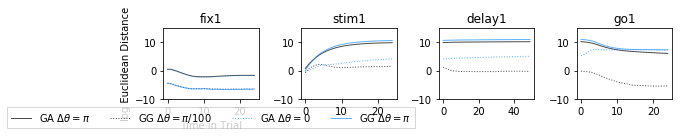

In [29]:
nc = 1
max_val = 450
med_val = 5
lw = 1
a = .7

def plot_one_row(ylim):
    fig = plt.figure(figsize=(8, 2),tight_layout=True,facecolor='white')
    plt.rcParams.update({'font.size': 10})
    c = 'dodgerblue'
    for ei in range(len(trial.epochs)):
        epoch = epoch_set[ei]
        if trial.epochs[epoch][1] is None:
            epoch_range = range(trial.epochs[epoch][0],T)
        elif trial.epochs[epoch][0] is None:
            epoch_range = range(0,trial.epochs[epoch][1])
        else:
            epoch_range = range(trial.epochs[epoch][0],trial.epochs[epoch][1])

    #     plt.subplot(nc,len(trial.epochs),ei+1)
    #     for t in range(len(X_diff_same_mod)):
    #         c = cmap(t/len(X_diff_same_mod))
    #         plt.plot(X_diff_same_mod[t,epoch_range].T,'-',c = c,alpha = .2)
    #     plt.title(epoch)

        plt.subplot(nc,len(trial.epochs),ei+1)
        plt.plot(np.mean(X_ga_pi_same_mod[:,epoch_range],axis = 0).T,'-k',
                 lineWidth = lw,alpha = a,label = 'GA $\\Delta \\theta = \\pi$')
        plt.ylim((ylim))

        plt.subplot(nc,len(trial.epochs),ei+1)
        plt.plot(np.mean(X_gg_1_same_mod[:,epoch_range],axis = 0).T,':k',
                 lineWidth = lw,alpha = a,label = 'GG $\\Delta \\theta = \\pi/100$')
        plt.ylim((ylim))

        plt.subplot(nc,len(trial.epochs),ei+1)
        plt.plot(np.mean(X_ga_0_same_mod[:,epoch_range],axis = 0).T,':',c = c, 
                 lineWidth = lw,alpha = a,label = 'GA $\\Delta \\theta = 0$')
        plt.ylim((ylim))

        plt.subplot(nc,len(trial.epochs),ei+1)
        plt.plot(np.mean(X_gg_pi_same_mod[:,epoch_range],axis = 0).T,'-',c = c, 
                 lineWidth = lw,alpha = a,label = 'GG $\\Delta \\theta = \\pi$')
        plt.ylim((ylim))

        plt.title(epoch)
        if ei is 0:
            plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=False, shadow=False, ncol=5)
            plt.xlabel('Time in Trial')
            plt.ylabel('log Euclidean Distance')

    plt.savefig(fldr + '/X_diff_plots_one_row_ylim' +str(ylim)+'_' + rule_set[0]+'_'+rule_set[1]+ 
        filename + '_ckpt_'+ str(ckpt_n) + '_model_' + str(model_n) + '.svg')
    plt.show()
    
plot_one_row([-10,15])
# plot_one_row(30)

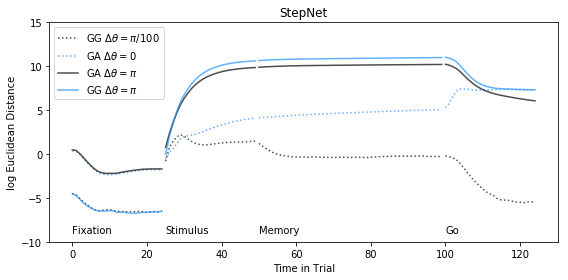

In [30]:
nc = 1
max_val = 450
med_val = 5
lw = 1.5
a = .7
epoch_names = ['Fixation','Stimulus','Memory','Go']
epoch_offset = -10

def plot_one_row(ylim):
    fig = plt.figure(figsize=(8, 4),tight_layout=True,facecolor='white')
    plt.rcParams.update({'font.size': 10})
    c = 'dodgerblue'
    for ei in range(len(trial.epochs)):
        epoch = epoch_set[ei]
        if trial.epochs[epoch][1] is None:
            epoch_range = range(trial.epochs[epoch][0],T)
        elif trial.epochs[epoch][0] is None:
            epoch_range = range(0,trial.epochs[epoch][1])
        else:
            epoch_range = range(trial.epochs[epoch][0],trial.epochs[epoch][1])

    #     plt.subplot(nc,len(trial.epochs),ei+1)
    #     for t in range(len(X_diff_same_mod)):
    #         c = cmap(t/len(X_diff_same_mod))
    #         plt.plot(X_diff_same_mod[t,epoch_range].T,'-',c = c,alpha = .2)
    #     plt.title(epoch)

        
        plt.plot(epoch_range,np.mean(X_gg_1_same_mod[:,epoch_range],axis = 0).T,':k',
                 lineWidth = lw,alpha = a,label = 'GG $\\Delta \\theta = \\pi/100$')
        
        plt.plot(epoch_range,np.mean(X_ga_0_same_mod[:,epoch_range],axis = 0).T,':',c = c, 
                 lineWidth = lw,alpha = a,label = 'GA $\\Delta \\theta = 0$')
        
        plt.plot(epoch_range,np.mean(X_ga_pi_same_mod[:,epoch_range],axis = 0).T,'-k',
                 lineWidth = lw,alpha = a,label = 'GA $\\Delta \\theta = \\pi$')

        plt.plot(epoch_range,np.mean(X_gg_pi_same_mod[:,epoch_range],axis = 0).T,'-',c = c, 
                 lineWidth = lw,alpha = a,label = 'GG $\\Delta \\theta = \\pi$')
#         plt.plot([epoch_range[0], epoch_range[-1]],[epoch_offset,epoch_offset],'-k')
        plt.text(epoch_range[0],.9*epoch_offset,epoch_names[ei])
        
        plt.ylim((ylim))

        
        if ei is 0:
            plt.legend()
            plt.xlabel('Time in Trial')
            plt.ylabel('log Euclidean Distance')
            plt.title('StepNet')

    plt.savefig(fldr + '/X_diff_plots_one_axis_ylim' +str(ylim)+'_' + rule_set[0]+'_'+rule_set[1]+ 
        filename + '_ckpt_'+ str(ckpt_n) + '_model_' + str(model_n) + '.svg')
    plt.show()
    
plot_one_row([-10,15])
# plot_one_row(30)

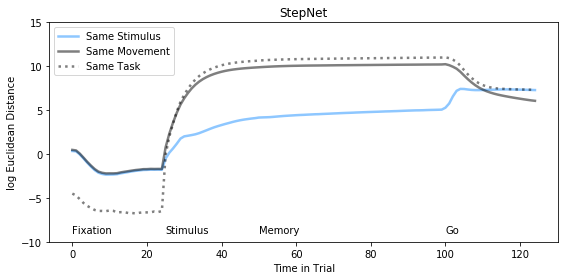

In [31]:
nc = 1
max_val = 450
med_val = 5
lw = 2.5
a = .5
epoch_names = ['Fixation','Stimulus','Memory','Go']
epoch_offset = -10

def plot_one_row_simple(ylim):
    fig = plt.figure(figsize=(8, 4),tight_layout=True,facecolor='white')
    plt.rcParams.update({'font.size': 10})
    c = 'dodgerblue'
    epoch_range = range(np.shape(trial.x)[0])

    plt.plot(epoch_range,np.mean(X_ga_0_same_mod[:,epoch_range],axis = 0).T,'-',c = c, 
             lineWidth = lw,alpha = a,label = 'Same Stimulus')

    plt.plot(epoch_range,np.mean(X_ga_pi_same_mod[:,epoch_range],axis = 0).T,'-',c = 'k',
             lineWidth = lw,alpha = a,label = 'Same Movement')

    plt.plot(epoch_range,np.mean(X_gg_pi_same_mod[:,epoch_range],axis = 0).T,':',c = 'k',
             lineWidth = lw,alpha = a,label = 'Same Task')
    
    for ei in range(len(trial.epochs)):
        epoch = epoch_set[ei]
        if trial.epochs[epoch][1] is None:
            epoch_range = range(trial.epochs[epoch][0],T)
        elif trial.epochs[epoch][0] is None:
            epoch_range = range(0,trial.epochs[epoch][1])
        else:
            epoch_range = range(trial.epochs[epoch][0],trial.epochs[epoch][1])
        plt.text(epoch_range[0],.9*epoch_offset,epoch_names[ei])

    plt.ylim((ylim))
    plt.legend()
    plt.xlabel('Time in Trial')
    plt.ylabel('log Euclidean Distance')
    plt.title('StepNet')

    plt.savefig(fldr + '/X_diff_plots_one_axis_ylim_simple' +str(ylim)+'_' + rule_set[0]+'_'+rule_set[1]+ 
        filename + '_ckpt_'+ str(ckpt_n) + '_model_' + str(model_n) + '.svg')
    plt.show()
    
plot_one_row_simple([-10,15])

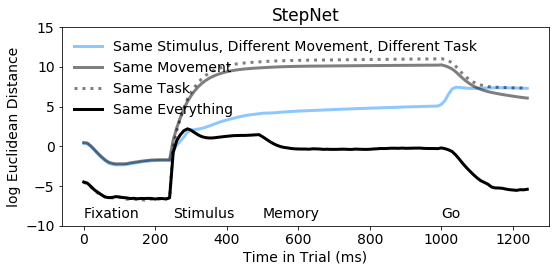

In [32]:
nc = 1
max_val = 450
med_val = 5
lw = 3
a = .5
epoch_names = ['Fixation','Stimulus','Memory','Go']
epoch_offset = -10

def plot_one_row_simple(ylim):
    fig = plt.figure(figsize=(8, 4),tight_layout=True,facecolor='white')
    plt.rcParams.update({'font.size': 14})
    c = 'dodgerblue'
    epoch_range = range(np.shape(trial.x)[0])
    plot_range = range(10*epoch_range[0],10*(epoch_range[-1]+1),10)

    plt.plot(plot_range,np.mean(X_ga_0_same_mod[:,epoch_range],axis = 0).T,'-',c = c, 
             lineWidth = lw,alpha = a,label = 'Same Stimulus, Different Movement, Different Task')

    plt.plot(plot_range,np.mean(X_ga_pi_same_mod[:,epoch_range],axis = 0).T,'-',c = 'k',
             lineWidth = lw,alpha = a,label = 'Same Movement')

    plt.plot(plot_range,np.mean(X_gg_pi_same_mod[:,epoch_range],axis = 0).T,':',c = 'k',
             lineWidth = lw,alpha = a,label = 'Same Task')
    
    plt.plot(plot_range,np.mean(X_gg_1_same_mod[:,epoch_range],axis = 0).T,'-',c = 'k',
             lineWidth = lw,alpha = 1,label = 'Same Everything')
    
    for ei in range(len(trial.epochs)):
        epoch = epoch_set[ei]
        if trial.epochs[epoch][1] is None:
            epoch_range = range(trial.epochs[epoch][0],T)
        elif trial.epochs[epoch][0] is None:
            epoch_range = range(0,trial.epochs[epoch][1])
        else:
            epoch_range = range(trial.epochs[epoch][0],trial.epochs[epoch][1])
        plt.text(10*epoch_range[0],.9*epoch_offset,epoch_names[ei])

    plt.ylim((ylim))
    plt.legend(loc='upper left',frameon=False, fontsize = 14)
    plt.xlabel('Time in Trial (ms)')
    plt.ylabel('log Euclidean Distance')
    plt.title('StepNet')

    plt.savefig(fldr + '/X_diff_plots_one_axis_ylim_simple' +str(ylim)+'_' + rule_set[0]+'_'+rule_set[1]+ 
        filename + '_ckpt_'+ str(ckpt_n) + '_model_' + str(model_n) + '.svg')
    plt.show()
    
plot_one_row_simple([-10,15])

In [ ]:
gen_X_from_model_dir

In [16]:
# dir_specific_single = #'single_tasks'#'grad_norm_l2h000001'
dir_specific_all = 'grad_norm_l2h000001'#'grad_norm_l2001' #'combos'#'grad_norm_l2001' #
rule_list = ['delaygo','delayanti']

fig = plt.figure(figsize=(5, 5),tight_layout=True,facecolor='white')
plt.rcParams.update({'font.size': 16})
file_name = 'pca on go period'
epoch = 'go1'
split_ind = trial1.epochs['go1'][0]

for rule1_ind in range(len(rule_list)):
    for rule2_ind in range(rule1_ind+1,len(rule_list)):
        rule1 = rule_list[rule1_ind]
        rule2 = rule_list[rule2_ind]

        # for model_n in range(1):
        model_n = 1
        model_dir_all = os.path.join('/Users/lauradriscoll/Documents/data/rnn/multitask/lowD/',dir_specific_all,'most',str(model_n))

        #MULTI
        model = Model(model_dir_all)
        ckpt_n = name_best_ckpt(model_dir_all,'contextdelaydm1')
        ckpt_n_dir = os.path.join(model_dir_all,'ckpts/model.ckpt-' + str(int(ckpt_n)))

        trial1 = gen_trials_from_model_dir(model_dir_all,rule1)
        trial2 = gen_trials_from_model_dir(model_dir_all,rule2)
        
        trial_mix12 = trial1
        trial_mix12.x = np.concatenate((trial1.x[:split_ind,:,:],trial2.x[split_ind:,:,:]),axis = 0)
        trial1 = gen_trials_from_model_dir(model_dir_all,rule1)
        
        X1 = gen_X_from_model_dir_epoch(model_dir_all,ckpt_n_dir,trial1,epoch)
        X2 = gen_X_from_model_dir_epoch(model_dir_all,ckpt_n_dir,trial2,epoch)
        X12 = gen_X_from_model_dir_epoch(model_dir_all,ckpt_n_dir,trial_mix12,epoch)
        
        X = np.concatenate((X1, X2), axis = 1)
        N,S = np.shape(X) # neurons x trials (stim)  
        pca = PCA()
        X_pca = pca.fit_transform(X.T)

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/lowD/grad_norm_l2h000001/most/1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/lowD/grad_norm_l2h000001/most/1/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/lowD/grad_norm_l2h000001/most/1/ckpts/model.ckpt-146000
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/lowD/grad_norm_l2h000001/most/1/ckpts/model.ckpt-146000
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype

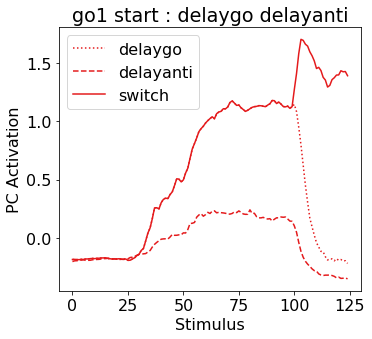

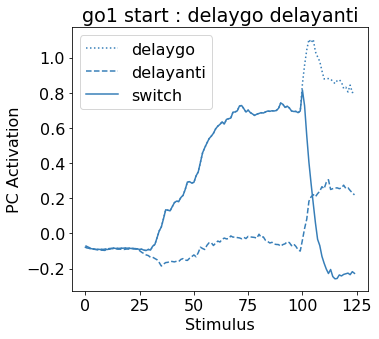

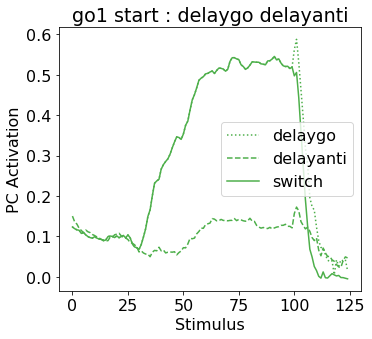

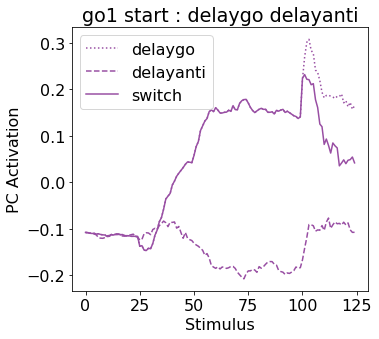

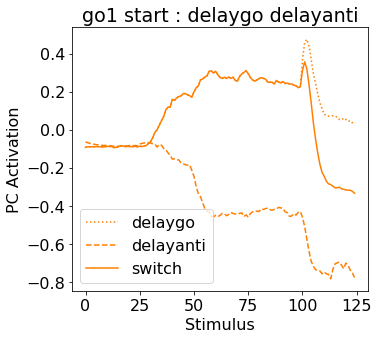

In [19]:
X1 = gen_X_from_model_dir(model_dir_all,ckpt_n_dir,trial1)
X2 = gen_X_from_model_dir(model_dir_all,ckpt_n_dir,trial2)
X12 = gen_X_from_model_dir(model_dir_all,ckpt_n_dir,trial_mix12)
X = np.concatenate((X1, X2), axis = 1)
N,S = np.shape(X) # neurons x trials (stim)  
X_pca = pca.transform(X.T)
X12_pca = pca.transform(X12.T)

n_pcs = 5
cmap=plt.get_cmap('Set1')
for pc in range(n_pcs):
    fig = plt.figure(figsize=(10, 5),tight_layout=True,facecolor='white')
    c = cmap(pc/9)
    plt.subplot(1,2,1)
    plt.plot(X_pca[0:125,pc],':',c = c,label = rule_list[0])
    plt.plot(X_pca[10000:10125,pc],'--',c = c,label = rule_list[1])
    plt.plot(X12_pca[0:125,pc],'-',c = c,label = 'switch')
    plt.legend()
    plt.title(epoch+' start : ' +rule1+' '+rule2)
    plt.xlabel('Stimulus')
    plt.ylabel('PC Activation')

#     plt.subplot(1,2,2)
#     plt.plot(X_pca[24:10000:25,pc],':',c = c)
#     plt.plot(X_pca[10024:20000:25,pc],c = c)
#     plt.plot(X12_pca[24:10000:25,pc],'--',c = c)
#     plt.title(epoch+' end : ' +rule1+' '+rule2)
#     plt.xlabel('Stimulus')
#     plt.legend(('PC1 '+rule1,'PC1 '+rule2))

plt.show()